# **Arbres de Classification et de Régression :**

**l'objectif:**

La classification est une technique d'apprentissage automatique et d'analyse des données qui consiste à assigner des éléments à des catégories ou classes prédéfinies basées sur leurs caractéristiques. Elle est utilisée pour organiser et structurer des ensembles de données, facilitant ainsi leur interprétation et leur analyse. Dans notre base de données, nous utilisons cette méthode pour classifier les satisfactions des étudiants en fonction de leur niveau éducatif

**Importation des données :**

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("STUDENT ATTITUDE AND BEHAVIOR .csv")
df.head(5)

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree (percentage%),social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,160,Morning,40000,No,50,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,300,Morning,15000,Yes,75,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,115,Anytime,13000,Yes,50,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,120,Anytime,1500000,No,50,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,130,Morning,50000,Yes,25,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Arbre de décision :**

In [11]:
y = df['Do you like your degree?']
X = df[['10th Mark', '12th Mark','college mark']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((176, 3), (59, 3))

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
# entrainement du model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

[Text(0.4444444444444444, 0.9, 'x[1] <= 46.0\ngini = 0.165\nsamples = 176\nvalue = [16, 160]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5555555555555556, 0.7, 'x[0] <= 76.5\ngini = 0.157\nsamples = 175\nvalue = [15, 160]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 59.5\ngini = 0.027\nsamples = 72\nvalue = [1, 71]'),
 Text(0.2222222222222222, 0.3, 'x[1] <= 58.0\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 90.1\ngini = 0.235\nsamples = 103\nvalue = [14, 89]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 63.83\ngini = 0.289\nsamples = 80\nvalue = [14, 66]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.352\nsampl

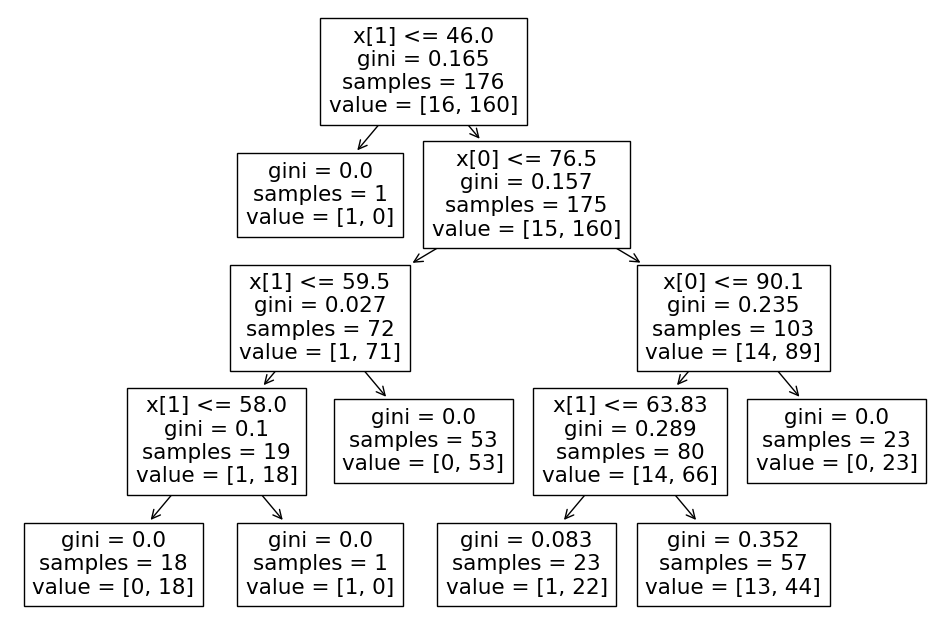

In [14]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

**INTERPRETATION :**

L'affichage de l'arbre de décision avec des dimensions spécifiques (12 pouces en largeur et 8 pouces en hauteur) permet de visualiser les décisions prises pour classer la variable 'Do you like your degree?' parmi 176 observations. Cette variable est divisée en deux valeurs distinctes : 'No' avec 16 occurrences et 'Yes' avec 160 occurrences, en fonction de trois coordonnées : '10th Mark', '12th Mark', et 'College Mark'.

L'arbre commence par un nœud racine qui se caractérise par le critère que toutes les données ont une valeur inférieure à 46 en termes de la deuxième coordonnée, et il se divise en deux nœuds selon la première coordonnée (>76.5 ou <=76.5). Le premier nœud résultant est pur, contenant uniquement la première classe, donc son indice de Gini est de 0, indiquant une pureté totale. Le deuxième nœud est divisé à nouveau selon la première et la deuxième coordonnée en même temps (<=90.1 par rapport à la première coordonnée et > ou <=59.5 par rapport à la deuxième coordonnée), produisant à nouveau des nœuds purs de la deuxième classe et un autre nœud hybride. Cette dernière division conduit à quatre nœuds finaux, deux hybrides et deux purs (un avec seulement une donnée de la première classe et l'autre avec 18 données de la deuxième classe), et l'arbre s'arrête car sa profondeur maximale est de 3 niveaux.

**L' Arbre de décision optimale :**

Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}


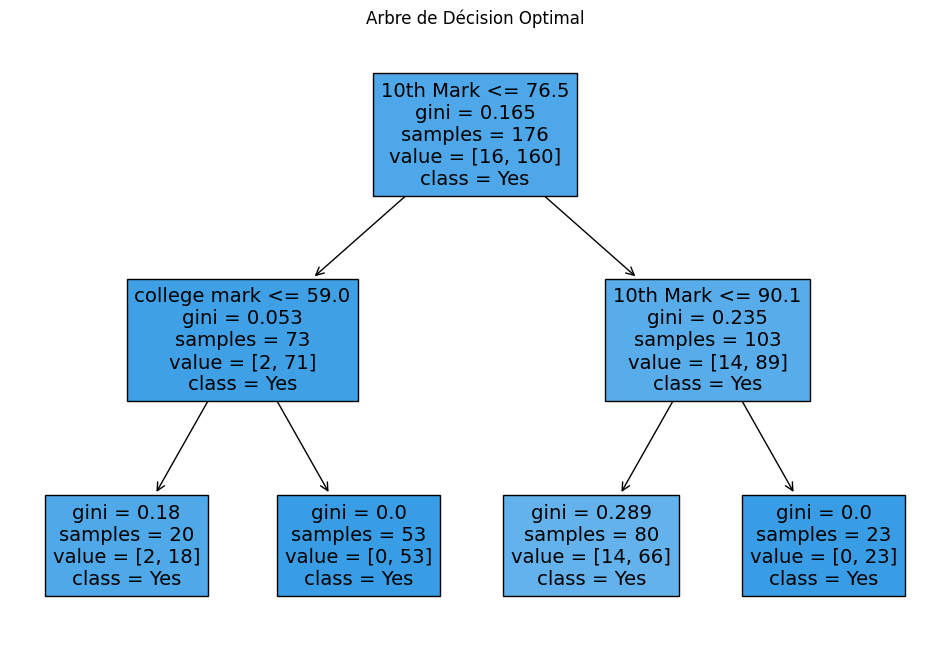

Do you like your degree?  No  Yes
Cluster                          
0                         13  139
1                          7   76


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Recherche des hyperparamètres optimaux pour l'arbre de décision
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Entraînement de l'arbre de décision optimal
clf_optimal = grid_search.best_estimator_
clf_optimal.fit(X_train, y_train)

# Affichage de l'arbre de décision optimal
plt.figure(figsize=(12, 8))
plot_tree(clf_optimal, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Arbre de Décision Optimal')
plt.show()

# Application de k-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Ajout des labels k-means au DataFrame
df['Cluster'] = kmeans.labels_

# Vérification de l'association entre clusters et 'Do you like your degree?'
cluster_comparison = pd.crosstab(df['Cluster'], df['Do you like your degree?'])
print(cluster_comparison)

# Définir les couleurs des clusters en fonction des résultats de la comparaison
cluster_mapping = {0: 'No', 1: 'Yes'} if cluster_comparison.loc[0, 'No'] > cluster_comparison.loc[0, 'Yes'] else {0: 'Yes', 1: 'No'}
df['Cluster_Label'] = df['Cluster'].map(cluster_mapping)

# Définir les couleurs des clusters
colors = ['white' if label == 'No' else 'black' for label in df['Cluster_Label']]



**INTERPRETATION:**

ce code illustre une recherche des meilleurs hyperparamètres pour un modèle d'arbre de décision utilisé dans une tâche de régression. utilisé pour classifier les étudiants selon leur réponse à la question "Do you like your degree?" en fonction de leurs notes. L'arbre de décision utilise les notes de la 10ème année, de la 12ème année et les notes universitaires pour effectuer des séparations successives et aboutir à des prédictions finales

Une fois les meilleurs hyperparamètres identifiés, un nouvel arbre de décision est construit en utilisant ces paramètres optimaux. Ce modèle est ensuite entraîné sur l'ensemble de données complet et l'arbre de décision résultant est affiché pour visualisation